In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
sale = pd.read_csv('advertising.csv')
sale.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
# Five point summary of data
sale.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [4]:
# Data type 
sale.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [5]:
# Shape of data
sale.shape

(200, 4)

In [6]:
# Information about Data
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
# Check that any Null value present in Data
sale.isnull().sum()/len(sale)*100


# Here No null value pr missing value present in Data

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

**Perform EDA On Data**

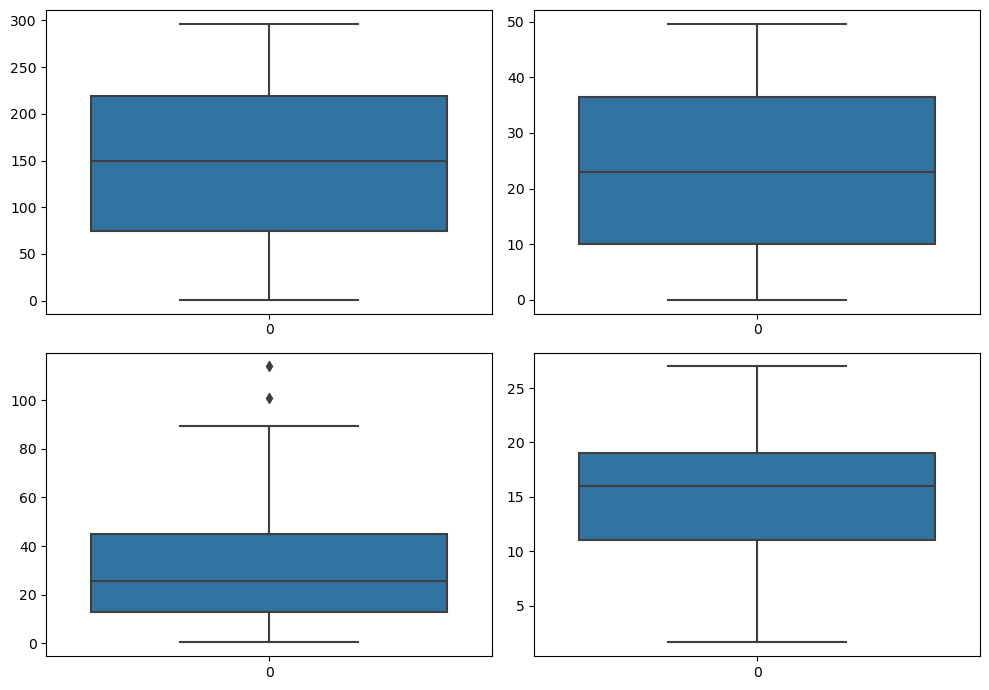

In [8]:
nrow = 2
ncol = 2
repeater = 1
plt.figure(figsize=(10,7))
for i in sale.select_dtypes(include=np.number).columns:
    plt.subplot(nrow , ncol , repeater)
    sns.boxplot(sale.loc[:, i])
    repeater=repeater+1
plt.tight_layout()
plt.show()
    

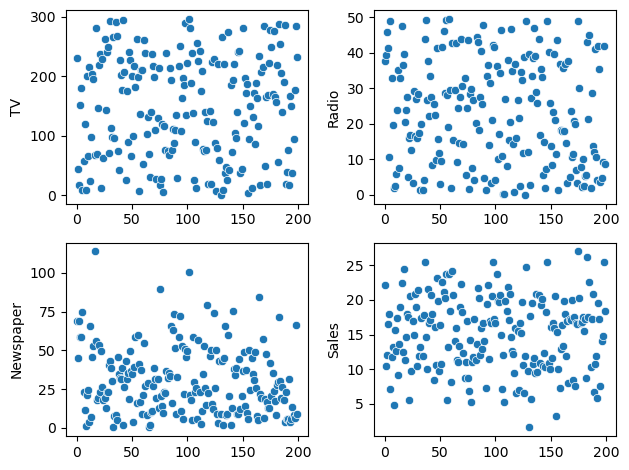

In [9]:
nrow = 2
ncol = 2
repeater = 1
for i in sale.select_dtypes(include=np.number).columns:
    plt.subplot(nrow , ncol , repeater)
    sns.scatterplot(sale.loc[:, i])
    repeater=repeater+1
plt.tight_layout()
plt.show()


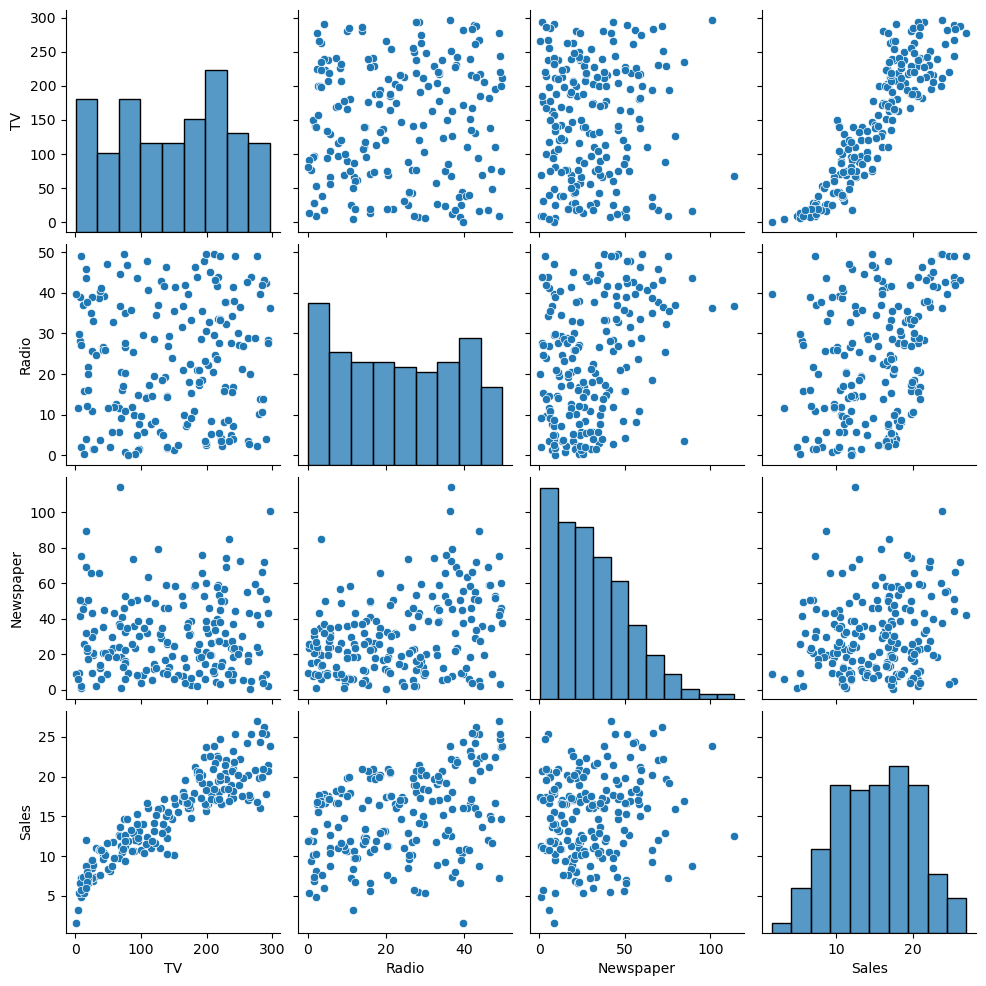

In [10]:
sns.pairplot(sale)
plt.show()

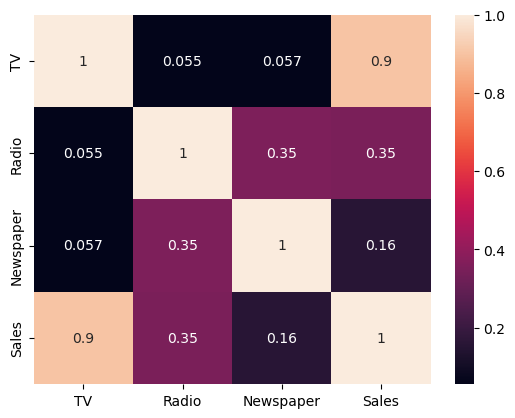

In [11]:
sns.heatmap(sale.corr(),annot=True)
plt.show()

**Splitting the Data**

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score, mean_absolute_error,r2_score

In [13]:
X = sale.drop('Sales',axis=1)
y = sale['Sales']

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X, y ,test_size=0.2,random_state=42)

**Model Prediction**

In [15]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [16]:
y_pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [17]:
# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 2.91


In [18]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # setting squared=False gives RMSE
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error (MSE): 2.91
Root Mean Squared Error (RMSE): 1.71
R-squared: 0.91


**Conclusion:**

The linear regression model provides a strong fit to the data, explaining 91% of the variability in Sales using the predictors TV, Radio, and Newspaper. On average, the model's predictions are off by about 1.71 units from the actual Sales values. Given the high R-squared value, the model seems to be capturing the underlying relationship effectively. However, when evaluating the performance, it's crucial to consider domain-specific knowledge, the scale of the 'Sales' variable, and the business implications of the RMSE value.

**Business Summary:**

We built a predictive model to understand and quantify the relationships between advertising spends across TV, 
Radio, and Newspaper channels, and the resulting Sales.

The model can account for a significant 91% of the variations in Sales based on the advertising spends across the three channels. This high degree of fit suggests that our advertising inputs are strong predictors of sales outcomes, and decision-makers can rely on this model to understand the impact of advertising strategies